# Concrete crack detedtion system

## Introduction

![](https://fthmb.tqn.com/9H6cVhjNBfUmsCI2Oy4U4hQMk6Q=/300x200/filters:saturation(0.2):brightness(10):contrast(5):no_upscale()/3509673328_9b7ed82212_b-5705a84d3df78c7d9e953054.jpg)

Concrete is arguably most widely used construction material in the entire world and arguably the most important material in civil engineering. Strength is one of the main reasons concrete has been used for constructions for many decades. It can easily withstand tensile and compressive stresses without getting affected. It is exceptionally durable and can last for ages as it can survive harsh weather conditions and disasters. It is rigid and resilient from deformation These characteristics, however, result in concrete structures lacking the flexibility to move in response to environmental or volume changes. Cracking is usually the first sign of distress in concrete [2]. It is, however, possible for deterioration to exist before cracks appear.

## Problem statement
Concrete surface cracks are major defect in civil structures (buildings, bridges, etc.) which if not treated on time, it would not only lead to the detrimental effect on its structural health and longevity but can cause real large-scale disasters which we have seen happened on many occasions in the past and claimed the lives of thousands. An example is the Dhaka garment factory collapse in Bangladesh. It occurred on 13th April 2013 and killed 1134 people and approximately 2500 injured [4]. To reduce such disasters from happening, structural inspection should be carried out on civil structures on regular basis. Structural inspection is done for the evaluation of rigidity and tensile strength of the structure. This is usually done by checking for cracks on concretes[2]. Crack detection plays a major role in a structural inspection process, finding the cracks and determining the building health. The cracked concretes are then replaced with new ones. As a data scientist I want to build a deep learning machine system that would be able to detect these crack concretes 

## Project objective
Creating a deep learning model using Convolutional neural network (CNN) algorithm that would alert you when a crack concrete is detected. Convolutional neural network is a class of deep neural networks, most applied to analyzing visual imagery. I will be making use of important CNN libraries such as keras.  Keras is an open-source software  library that provides a python interface for artificial neural networks.


## Methodology
This is an image  classification problem which involves giving an image  as the input to a model built using a specific algorithm that outputs the class or the probability of the class that the image belongs to. This process in which we label an image to a particular class is called Supervised Learning. The algorithm is Convolutional neural network mostly used for visual imagery. CNN model consist of two main layers. The first part consists of the Convolutional layers and the Pooling layers in which the main feature extraction process takes place. In the second part, the Fully Connected and the Dense layers perform several non-linear transformations on the extracted features and act as the classifier part[3]. This model is explain and illustrated more detailly below
The metric I will be focusing on is a predicting metric. That is, a metrics better in predicting cracks   

## Releated work
A crack detection system was done with a similar dataset- structural network defect dataset(SDNET2018)  which contains over 56000  images of cracked and non-cracked concrete bridge decks, walls, and pavements. Most of the images were captured from Utah State University. The system had an accuracy of 76%

Link: https://www.kaggle.com/kanikepratap/cnn-assignment-ii-submitted

Milind Raj worked on a similar data using RESNET50 and obtained an accuracy rate of 95.3%

Link: https://github.com/MILIND-RAJ/Concrete-Crack-Images-Classification-Using-ResNet50/blob/master/Final_Assignment%20concrete.ipynb. 

## Business goal
For the projects which I have come across which used a similar dataset as seen above, , an accuracy in the range of 76- 95.3% was obtained. This project would be successful if I'm able to obtained an accuracy of at least 99% or better.

## Dataset
The data set is from the Mendeley data. The data was collected from various Middle East Technical University (METU) Campus Buildings. The dataset was published on 23rd June 2019 by Çağlar Fırat Özgenel [1]

My dataset is unstructured. The dataset is divided into two as negative and positive crack images for image classification. Each class has 20000images with a total of 40000 images with 227 x 227 pixels with RGB channels.

Link to dataset website: https://data.mendeley.com/datasets/5y9wdsg2zt/2

Link to dataset: https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/5y9wdsg2zt-2.zip

## import needed libraries

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
#OpenCV-Python is a library of Python bindings designed to solve computer vision problems at real time

In [3]:
import cv2 as cv #cv2.imshow() method is used to display an image in a window. The window automatically fits to the image size.
import numpy as np #contains a large number of various mathematical operations.
import pandas as pd #Open source, easy-to-use data structures and data analysis tools
import matplotlib.pyplot as plt #State-based interface to matplotlib. It provides a MATLAB-like way of plotting
import seaborn as sns #Uses matplotlib underneath to plot graphs
from pathlib import Path # provides an object Application programming interface API for working files and directories
from sklearn.model_selection import train_test_split #use to split my dataset into train and test
from keras.models import Sequential # it allows us to create models layer by layer in a step by step fashion
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout # layers are the basic building blocks of neural networks in keras
import tensorflow as tf
import keras
from sklearn.metrics import confusion_matrix, classification_report 
from tensorflow.keras import datasets, layers, models

In [4]:
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator

## Image dataset window  File  system path

In [5]:
#Represents the concrete Windows file system paths.
positive_dir = Path('/Users/mbahc/OneDrive/Desktop/Concrete_images/Positive')
negative_dir = Path('/Users/mbahc/OneDrive/Desktop/Concrete_images/Negative')
positive_dir

WindowsPath('/Users/mbahc/OneDrive/Desktop/Concrete_images/Positive')

## Creating dataframe 

In [6]:
def generate_df(image_dir, label):
    filepaths = pd.Series(list(image_dir.glob(r'*.jpg')), name='Filepath').astype(str)
    labels = pd.Series(label, name='Label', index=filepaths.index)
    df = pd.concat([filepaths, labels], axis=1)
    return df

A function generate_df is called that takes in image_dr and labels as arguments and returns a dataframe

It creats two series,filepaths representing the image_dir of all the images in the folder and the second series is called labels
which is either negative or postive depending on whether the concrete is crack or normal

The function returns a dataframe after concatenating the two series into a dataframe along the axis=1

In [7]:
#Concatenate the two dataframe that is positive_df and negative_df
positive_df = generate_df(positive_dir, label="POSITIVE")
negative_df = generate_df(negative_dir, label="NEGATIVE")

all_df = pd.concat([positive_df, negative_df], axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
all_df

,Filepath,Label
0,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
1,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
2,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
3,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,NEGATIVE
4,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
...,...,...
39995,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
39996,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,NEGATIVE
39997,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
39998,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE


## Data exploration

In [8]:
# Head
df1= all_df
df1.head()

,Filepath,Label
0,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
1,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
2,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
3,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,NEGATIVE
4,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE


In [9]:
#Tail
df1.tail()

,Filepath,Label
39995,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
39996,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,NEGATIVE
39997,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
39998,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
39999,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,NEGATIVE


In [10]:
#sample
df1.sample(10)

,Filepath,Label
10110,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,NEGATIVE
36634,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
2349,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,NEGATIVE
21562,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
17289,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
29704,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,NEGATIVE
31093,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,NEGATIVE
23619,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
7311,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
6741,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,NEGATIVE


In [11]:
# checking for missing data
df1.isnull().sum()

Filepath    0
Label       0
dtype: int64

In [12]:
#shape
df1.shape

(40000, 2)

## Splitting dataset into train and test

In [13]:
np.random.seed(0) # ensures when we put same seed, we get the same pattern of random numbers.
train_df, test_df = train_test_split(df1,
    train_size=0.8,
    shuffle=True,
    random_state=1
)

In [14]:
train_df.shape

(32000, 2)

In [15]:
test_df.shape

(8000, 2)

In [16]:
test_df.head(10)

,Filepath,Label
3841,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,NEGATIVE
12898,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
15032,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,NEGATIVE
36781,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,NEGATIVE
9201,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,NEGATIVE
21288,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
37321,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,POSITIVE
8600,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,NEGATIVE
33089,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,NEGATIVE
39511,\Users\mbahc\OneDrive\Desktop\Concrete_images\...,NEGATIVE


## Image data preprocessing

In [17]:
# Initialising the generators for train and test data 
# The rescale parameter ensures the input range in [0, 1]
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.10
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

## Creating generator with batch size 128

In [18]:
# Creating the generators with each batch of size = 64 images 
# The train_df  contains input classes 
# Here it is 'Positive' and 'Negative' so class_mode is binary 
# The target size is the size of  input images, each image will be resized to this size
# shuffle: Whether to shuffle the data. Default: True. If set to False, sorts the data in alphanumeric order.
# batch_size: Size of the batches of data. Default: 32.
# color mode is RGB
#The batch size defines the number of samples that will be propagated through the network at an instant.


train_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='training'
)

Found 28800 validated image filenames belonging to 2 classes.


In [19]:
#We can get a dictionary that maps the class labels to the index of the prediction vector that we get as the output when we use
label_map1 = (train_data.class_indices)
label_map1

{'NEGATIVE': 0, 'POSITIVE': 1}

In [20]:
val_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 3200 validated image filenames belonging to 2 classes.


In [21]:
# Dictionary  that maps the class labels to the index of the prediction vector that we get as the output when we use
label_map2 = (val_data.class_indices)
label_map2

{'NEGATIVE': 0, 'POSITIVE': 1}

In [22]:
test_data = train_gen.flow_from_dataframe(
    test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=False,
    seed=42
)

Found 8000 validated image filenames belonging to 2 classes.


In [23]:
label_map3 = (test_data.class_indices)
label_map3

{'NEGATIVE': 0, 'POSITIVE': 1}

## Visualization

This inolves understanding my datasets by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.

Text(0.5, 1.0, 'Frequency of each label')

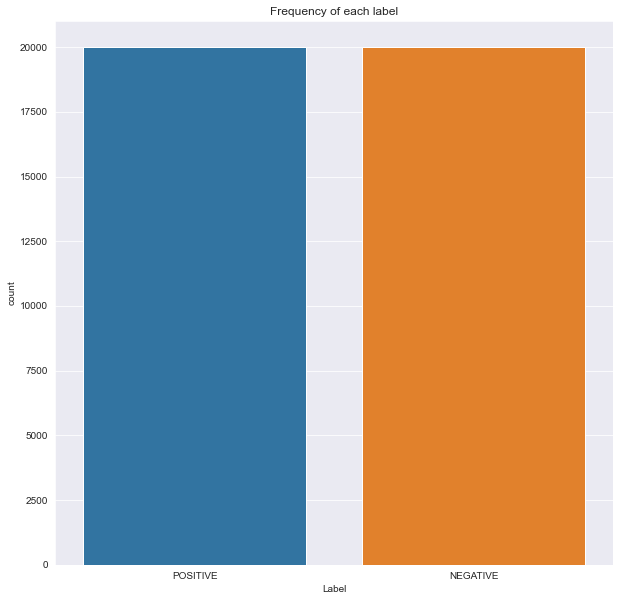

In [24]:
# label count
plt.figure(figsize = (10,10)) 
sns.set_style("darkgrid")
sns.countplot(df1['Label'])
plt.title("Frequency of each label")

## Preview of images in the train data set

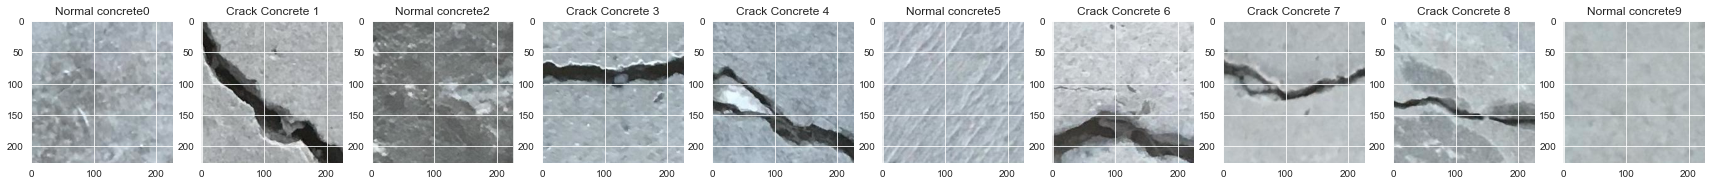

In [25]:
fig,a =  plt.subplots(1,10)
fig.set_figheight(30)
fig.set_figwidth(30)
for i in range(10):
    img = cv.imread(str(train_df.iloc[i]['Filepath']))
    a[i].imshow(img)
    if train_df.iloc[i]['Label']=='POSITIVE':
        title = "Crack Concrete " + str(i)
    else:
        title="Normal concrete" + str(i)
    a[i].set_title(title)

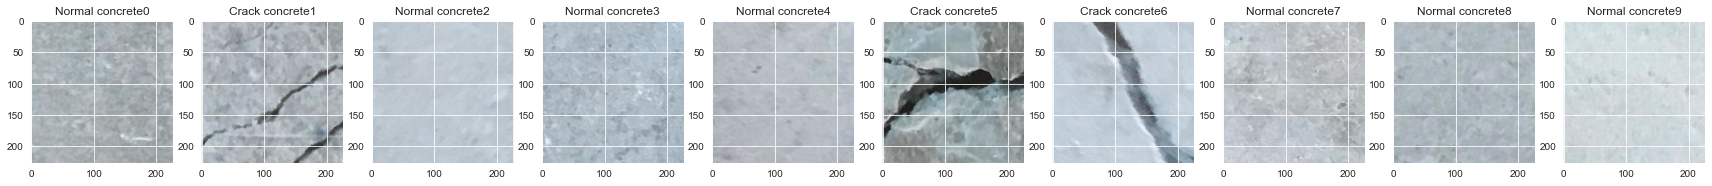

In [26]:
fig,a =  plt.subplots(1,10)
fig.set_figheight(30)
fig.set_figwidth(30)
for i in range(10):
    img = cv.imread(str(test_df.iloc[i]['Filepath']))
    a[i].imshow(img)
    if test_df.iloc[i]['Label']=='POSITIVE':
        title = "Crack concrete" + str(i)
    else:
        title="Normal concrete" + str(i)
    a[i].set_title(title)

## Data augmentation
Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.
In keras, there is a handy group of arguments in “ImageDataGenerator” that allows for image augmentation on the fly. I’ll touch on using both approaches, starting with manual image augmentation.

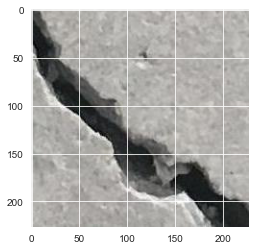

In [27]:
# Loading desired images
from keras.preprocessing.image import load_img
img = load_img(train_df.iloc[1]['Filepath'])
plt.imshow(img)

## Random rotation
The image rotation technique enables the model by generating images of different orientations. The ImageDataGenerator class in Keras uses this technique to generate randomly rotated images.

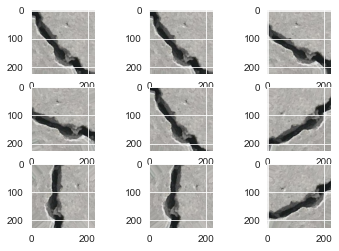

In [28]:
# For processing, we are converting the image(s) to an array
data = img_to_array(img)
# Expanding dimension to one sample
samples = expand_dims(data, 0)
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(rotation_range=90)
# Creating an iterator for data augmentation
it = datagen.flow(samples, batch_size=1)
# Preparing the Samples and Plot for displaying output
for i in range(9):
    # preparing the subplot
    pyplot.subplot(330 + 1 + i)
    # generating images in batches
    batch = it.next()
    # Remember to convert these images to unsigned integers for viewing 
    image = batch[0].astype('uint8')
    # Plotting the data
    pyplot.imshow(image)
# Displaying the figure
pyplot.show()

## Random shifts
The random shifts technique helps in improving those images that are not properly positioned. There can be a scenario where they are not in the center of actual orientation. Keras ImageDataGenerator uses parameters height_shift_range for vertical shifts in an image and for horizontal shifts in an image, we can use width_shift_range. The values specified are either specified in the form of percentage or integer

### Horizontal random shift

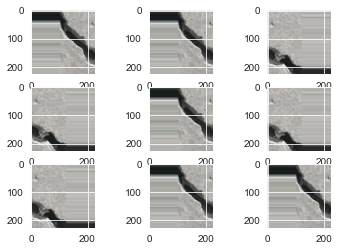

In [29]:
# For processing, we are converting the image(s) to an array
data = img_to_array(img)
# Expanding dimension to one sample
samples = expand_dims(data, 0)
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(width_shift_range=[-100,100])
# Creating an iterator for data augmentation
it = datagen.flow(samples, batch_size=1)
# Preparing the Samples and Plot for displaying output
for i in range(9):
    # preparing the subplot
    pyplot.subplot(330 + 1 + i)
    # generating images in batches
    batch = it.next()
    # Remember to convert these images to unsigned integers for viewing 
    image = batch[0].astype('uint8')
    # Plotting the data
    pyplot.imshow(image)
# Displaying the figure
pyplot.show()

### Vetical shift
For the vertical shift data augmentation technique, we are using height_shift_range argument.

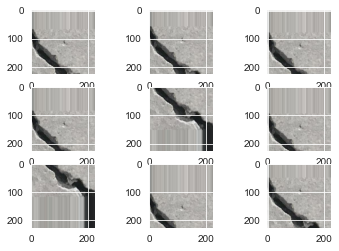

In [30]:
# For processing, we are converting the image(s) to an array
data = img_to_array(img)
# Expanding dimension to one sample
samples = expand_dims(data, 0)
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(height_shift_range=0.5)
# Creating an iterator for data augmentation
it = datagen.flow(samples, batch_size=1)
# Preparing the Samples and Plot for displaying output
for i in range(9):
    # preparing the subplot
    pyplot.subplot(330 + 1 + i)
    # generating images in batches
    batch = it.next()
    # Remember to convert these images to unsigned integers for viewing 
    image = batch[0].astype('uint8')
    # Plotting the data
    pyplot.imshow(image)
# Displaying the figure
pyplot.show()

## Random flips
Another beneficial technique for performing augmentation is the flipping of images. ImageDataGenerator helps in flipping the images, it can either flip horizontally or vertically.

### Horizontal flips
For horizontal flip operation, we are using horizontal_flip argument.

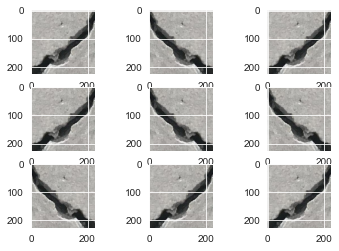

In [31]:
# For processing, we are converting the image(s) to an array
data = img_to_array(img)
# Expanding dimension to one sample
samples = expand_dims(data, 0)
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(horizontal_flip=True)
# Creating an iterator for data augmentation
it = datagen.flow(samples, batch_size=1)
# Preparing the Samples and Plot for displaying output
for i in range(9):
    # preparing the subplot
    pyplot.subplot(330 + 1 + i)
    # generating images in batches
    batch = it.next()
    # Remember to convert these images to unsigned integers for viewing 
    image = batch[0].astype('uint8')
    # Plotting the data
    pyplot.imshow(image)
# Displaying the figure
pyplot.show()

### Vertical flips
For vertical flips operations, we are using vertical flips argument

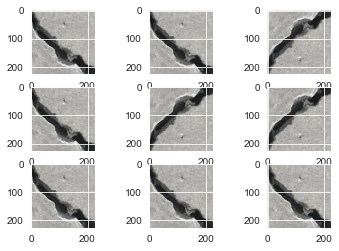

In [32]:
# For processing, we are converting the image(s) to an array
data = img_to_array(img)
# Expanding dimension to one sample
samples = expand_dims(data, 0)
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(vertical_flip=True)
# Creating an iterator for data augmentation
it = datagen.flow(samples, batch_size=1)
# Preparing the Samples and Plot for displaying output
for i in range(9):
    # preparing the subplot
    pyplot.subplot(330 + 1 + i)
    # generating images in batches
    batch = it.next()
    # Remember to convert these images to unsigned integers for viewing 
    image = batch[0].astype('uint8')
    # Plotting the data
    pyplot.imshow(image)
# Displaying the figure
pyplot.show()

## Random brightness
The fourth kind of augmentation technique is altering the brightness of images. This is the most useful technique as in most cases we have images with low or almost no lighting. Thus, we can train our model on the images generated using these images. For controlling the brightness in the images through ImageDataGenerator, we have an argument called brightness_range. For this parameter, the negative values will result in the darkening of images whereas positive values will produce bright images.

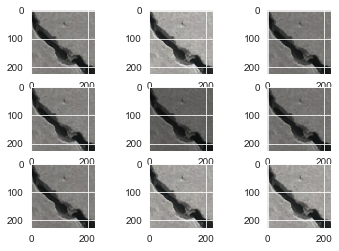

In [33]:
# For processing, we are converting the image(s) to an array
data = img_to_array(img)

# Expanding dimension to one sample
samples = expand_dims(data, 0)

# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])

# Creating an iterator for data augmentation
it = datagen.flow(samples, batch_size=1)

# Preparing the Samples and Plot for displaying output
for i in range(9):
    # preparing the subplot
    pyplot.subplot(330 + 1 + i)
    # generating images in batches
    batch = it.next()
    # Remember to convert these images to unsigned integers for viewing 
    image = batch[0].astype('uint8')
    # Plotting the data
    pyplot.imshow(image)
# Displaying the figure
pyplot.show()

## Random zoom
For zooming in, values lesser than 1 should be used. On the other hand, for zooming out, we have to use values greater than 1.This zooming in and zooming out operation is implemented using zoom_range argument.

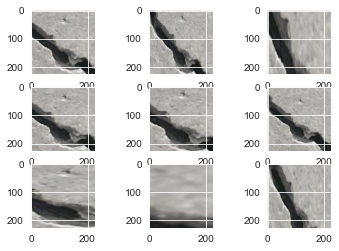

In [34]:
# For processing, we are converting the image(s) to an array
data = img_to_array(img)
# Expanding dimension to one sample
samples = expand_dims(data, 0)
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(zoom_range=[0.1,1.0])
# Creating an iterator for data augmentation
it = datagen.flow(samples, batch_size=1)
# Preparing the Samples and Plot for displaying output
for i in range(9):
    # preparing the subplot
    pyplot.subplot(330 + 1 + i)
    # generating images in batches
    batch = it.next()
    # Remember to convert these images to unsigned integers for viewing 
    image = batch[0].astype('uint8')
    # Plotting the data
    pyplot.imshow(image)
# Displaying the figure
pyplot.show()

## CNN MODEL

A CNN is made up of multiple layers of neurons. The layers mainly include convolutional layers and pooling layers. 
A convolutional layer contains a set of filters whose parameters need to be learned. The height and weight of the filters are smaller than those of the input volume. Each filter is convolved with the input volume to compute an activation map made of neurons

## Create the convolutional base

A sequential model allows us to create models layer by layer in a step by step fashion.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels).

My color channel is RGB.
My input shape is (120, 120, 3) were image_height is 120, image_width is 120 and  color_channels is 3

The activation function is a mathematical “gate” in between the input feeding the current neuron and its output going to the next layer. They basically decide whether the neuron should be activated or no

ReLU activation function is widely used and is default choice as it yields better results.
The RELU is  common because it is both simple to implement and effective at overcoming the limitations of other previously popular activation functions(vanishing gradient problem)
it is less susceptible to vanishing gradients that prevent deep models from being trained. ReLU suffers less from the vanishing gradient problem, because they only saturate in one direction
vanishing gradient problem: As more layers using certain activation functions are added to neural networks, the gradients of the loss function approaches zero, making the network hard to train.

### Cov2D
Keras Conv2D is a 2D Convolution Layer. This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs
Mandatory Conv2D parameter is the numbers of filters that convolutional layers will learn from.
Other parameters include kernel_size, activation function

### Pooling layers
Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network.
I'm using maxpooling which is an operation that selects the maximum element from the region of the feature map covered by the filter

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(120, 120, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))

In [36]:
#displaying the architecture of our model so far.

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

The output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument. Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

## Adding Dense layers on top

To complete the model, I will feed the last output tensor from the convolutional base (of shape (26, 26, 32)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, I will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. My dataset has 2 output classes, so I will use a final Dense layer with 2 outputs.

In [38]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

## Compiling and training the model

After the model is created, it is compiled using the Adam optimizer, one of the most popular optimization algorithms. Additionally,specify the loss type which is categorical cross entropy which is used for multi-class classification, binary cross-entropy can also be used as the loss function. Lastly, the metrics is specified  as accuracy which I want to analyze while the model is training.

### Optimizer
Adam optimizer performs the best on average compared to other optimizers
### Loss function
Because our labels is categorical 2 labels), the right loss function is catigorical crossentropy. It is used as a loss function for multi-class classification model where there are two or more output labels
### Metrics
We choose accuraccy which can be increase by increasing the number of epochs

In [40]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Epochs
It represents one training step

### Training the model
The model is train with Keras' fit() function. The model trains for 15 epochs. The fit() function will return a history object; By storying the result of this function in history, it is used  to plot the accuracy and loss function plots between training and validation which will help to analyze the model's performance visually

In [41]:
history = model.fit(train_data, validation_data = val_data, batch_size=64, epochs=15)

Epoch 1/15
450/450 [==============================] - 316s 702ms/step - loss: 0.0856 - accuracy: 0.9668 - val_loss: 0.0308 - val_accuracy: 0.9906
Epoch 2/15
450/450 [==============================] - 312s 693ms/step - loss: 0.0175 - accuracy: 0.9951 - val_loss: 0.0202 - val_accuracy: 0.9944
Epoch 3/15
450/450 [==============================] - 313s 694ms/step - loss: 0.0155 - accuracy: 0.9957 - val_loss: 0.0163 - val_accuracy: 0.9969
Epoch 4/15
450/450 [==============================] - 312s 694ms/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.0149 - val_accuracy: 0.9969
Epoch 5/15
450/450 [==============================] - 311s 692ms/step - loss: 0.0088 - accuracy: 0.9976 - val_loss: 0.0187 - val_accuracy: 0.9947
Epoch 6/15
450/450 [==============================] - 316s 702ms/step - loss: 0.0085 - accuracy: 0.9977 - val_loss: 0.0162 - val_accuracy: 0.9966
Epoch 7/15
450/450 [==============================] - 307s 681ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0172 -



By observing the training accuracy and loss, you can say that the model did a good job since after 20 epochs the training accuracy is 99% and the training loss is quite low.

### Training accuracy: 99.81%      Training loss: 00.58%

### Model evaluation on test accuracy

In [42]:
(ls,acc)=model.evaluate(test_data)

125/125 [==============================] - 31s 246ms/step - loss: 0.0060 - accuracy: 0.9983


In [43]:
print('MODEL ACCURACY = {}%'.format(acc*100), 'MODEL LOSS = {}%'.format(ls*100))

MODEL ACCURACY = 99.82500076293945% MODEL LOSS = 0.6019334308803082%


### Test accuracy: 99.50    Test loss: 2.47%

An accuracy of 99.50% looks impressive!

## VIsualizing the accuracy and loss of my model 
Putting my model evaluation into perspective by plotting the accuracy and loss plots of the training and validation data:

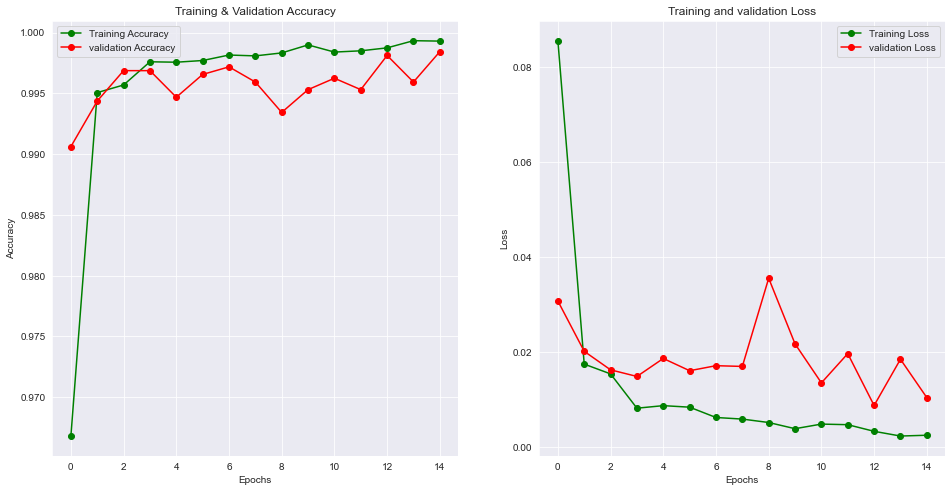

In [44]:
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,8)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'validation Loss')
ax[1].set_title('Training and validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [45]:
# Dictionary  that maps the class labels to the index of the prediction vector that we get as the output when we use
label_map = (test_data.class_indices)
label_map

{'NEGATIVE': 0, 'POSITIVE': 1}

## Predict labels

In [46]:
y_pred1 = model.predict(test_data)
y_pred1

array([[9.9999774e-01, 2.3030902e-06],
       [2.5647949e-24, 1.0000000e+00],
       [9.9999738e-01, 2.6488885e-06],
       ...,
       [1.2542755e-31, 1.0000000e+00],
       [9.9998498e-01, 1.5052628e-05],
       [9.9999833e-01, 1.7027860e-06]], dtype=float32)

In [47]:
y_pred1 = model.predict(test_data)
y_pred2=np.argmax(np.round(y_pred1),axis=1)
y_pred2

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

## Confusion matrix

In [48]:
cm = confusion_matrix(test_data.labels, y_pred2)

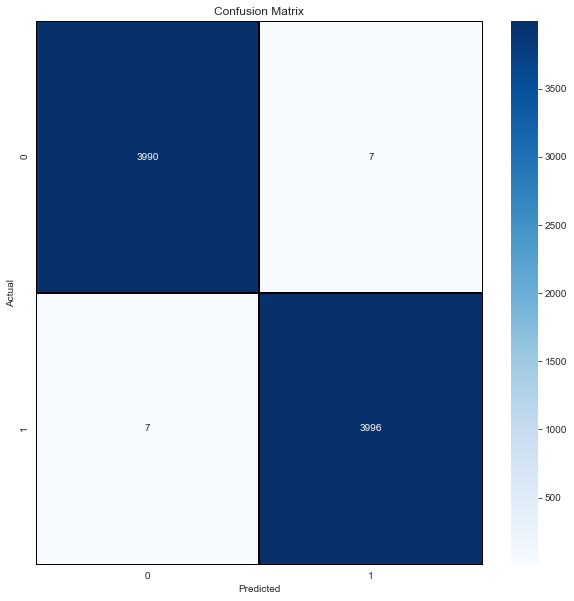

In [49]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()  

### True Positive (TP): 
True positive represents the value of correct predictions of positives out of actual positive cases. Out of 4003 actual positive, 3978 are correctly predicted as positive. Thus, the value of True Positive is 3978.
### False positive(FP)
False positive represents the value of incorrect positive predictions. This value represents the number of negatives (out of 3997) which gets falsely predicted as positive. Out of 3997 actual negative, 2 is falsely predicted as positive. Thus, the value of False Positive is 2.
### True Negative (TN)
True negative represents the value of correct predictions of negatives out of actual negative cases. Out of 3997 actual negative, 3995 is correctly predicted negative. Thus, the value of True Negative is 3995.
### False Negative (FN)
False negative represents the value of incorrect negative predictions. This value represents the number of positives (out of 4003) which gets falsely predicted as negative. Out of 4003 actual positive, 25 is falsely predicted as negative. Thus, the value of False Negative is 25.

My model is performing equally  for both classes regarding precision, recall and f1-score

### Precision
Precision: Model precision score represents the model’s ability to correctly predict the positives out of all the positive prediction it made. It represents the ratio between the number of Positive samples correctly classified to the total number of samples classified as Positive (either correctly or incorrectly)

### Precision Score = TP / (FP + TP)

###                 = 3978/( 2+3978)

###                 = 1.00

### Recall
Model recall score represents the model’s ability to correctly predict the positives out of actual positives.
The recall is calculated as the ratio between the number of Positive samples correctly classified as Positive to the total number of Positive samples. 

### Precision score = TP/(TP+FN)

###                 = 3978/(3978+25)

###                 = 0.99

### Accuracy score

Model accuracy score represents the model’s ability to correctly predict both the positives and negatives out of all the predictions.
Mathematically, it represents the ratio of sum of true positive and true negatives out of all the predictions.

### Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)

###                = (3978+3995)/(3978+25+3995+2)

###                = 1.00

### F1-score

Model F1 score represents the model score as a function of precision and recall score. The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.

### F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score/)

###          = 2* 1.00*0.99/(1.00+0.99)

###          = 0.99

## Classification report

Classification report helps us to observe which class the model performed bad out of the given two classes.

In [50]:
clr = classification_report(test_data.labels, y_pred2, target_names=["NEGATIVE", "POSITIVE"])
print(clr)

              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00      3997
    POSITIVE       1.00      1.00      1.00      4003

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



## Video link to phase 0 powerpoint presenation: https://www.youtube.com/watch?v=CMisxnjuEik
        
## Video link to phase 1 powerpoint presentation: https://www.youtube.com/watch?v=djxdvKlHlhA

## Video link to phase 2 powerpoint presentataion: https://www.youtube.com/watch?v=kYlO-trq0Bw

## References

[1] Özgenel, Ç. F. (2019, 07 23). Mendeley Data. Retrieved from Concrete Crack Images for Classification: https://data.mendeley.com/datasets/5y9wdsg2zt/2

[2] SCIENTIFIC, G. (2019, August 17). Evaluating Cracking in Concrete: Procedures. Retrieved from GIATEC: https://www.giatecscientific.com/education/cracking-in-concrete-procedures/

[3] Vadapalli, P. (2021, February 25). Image Classification in CNN: Everything You Need to Know. Retrieved from upgradeblog: https://www.upgrad.com/blog/image-classification-in-cnn/

[4] Wikipedia. (2021, February 13). 2013 Dhaka garment factory collapse. Retrieved from Wikipedia: https://en.wikipedia.org/wiki/2013_Dhaka_garment_factory_collapse

